# Monte Carlo Simulation

## Predicting Gross Profit

In [9]:
import numpy as np
import matplotlib.pyplot as plt

### Generate revenues

In [10]:
# revenue mean (in million of dollars)
rev_m = 170

# revenue standard deviation
rev_stdev = 20

# number of simulations
iterations = 1000

Perform simulations of future revenues using random distribution generator

In [11]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([154.70629265, 217.09253635, 210.52479728, 172.37036386,
       173.94261973, 193.55731655, 132.22850569, 174.39569596,
       160.67239296, 192.93197236, 171.03641858, 176.21213758,
       184.41046446, 188.88244098, 163.27600721, 152.23928633,
       187.27480868, 162.63671441, 162.98240968, 156.41092273,
       170.54282434, 208.38689733, 167.67861435, 211.89650238,
       171.40240987, 174.25785001, 176.98117851, 192.42958804,
       157.12678368, 159.66632017, 166.22341103, 142.97193727,
       152.31513017, 171.55149001, 182.77409954, 191.50122403,
       178.33263062, 163.97296438, 169.66718782, 181.87136003,
       183.35680409, 172.71378866, 181.51149205, 158.90231481,
       179.47219291, 164.44599596, 166.99616939, 188.68701554,
       158.40515955, 149.25990117, 180.48455099, 201.40702912,
       188.33488492, 162.49517462, 168.33830014, 185.07841455,
       179.47381443, 146.8491046 , 161.31545482, 180.88036919,
       167.75522447, 172.09577518, 161.91365617, 173.97

Plot the revenues

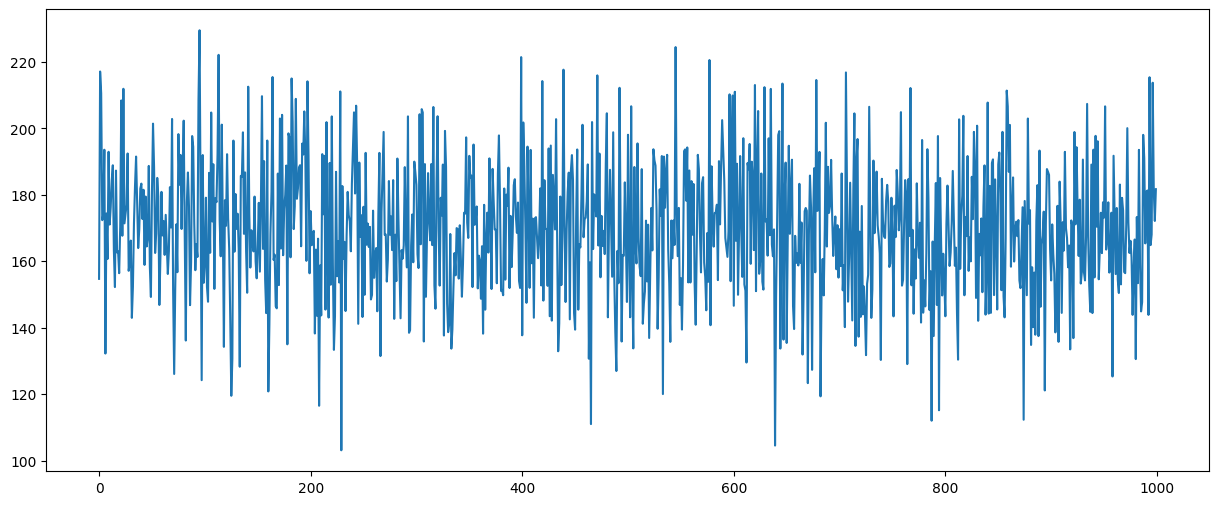

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

### Calculate COGS

Assume in this business, COGS amount is approximately 60% of the company's annual revenues, with the standard deviation is 10%

COGS are money spent, therefore we should put a minus sign in Python code.

We won't simulate COGS $1000$ times, this has been done for revenues. We must assign a random COGS value to each revenues from a random normal distribution with a mean of $0.6$ and a standard deviation of $0.1$.

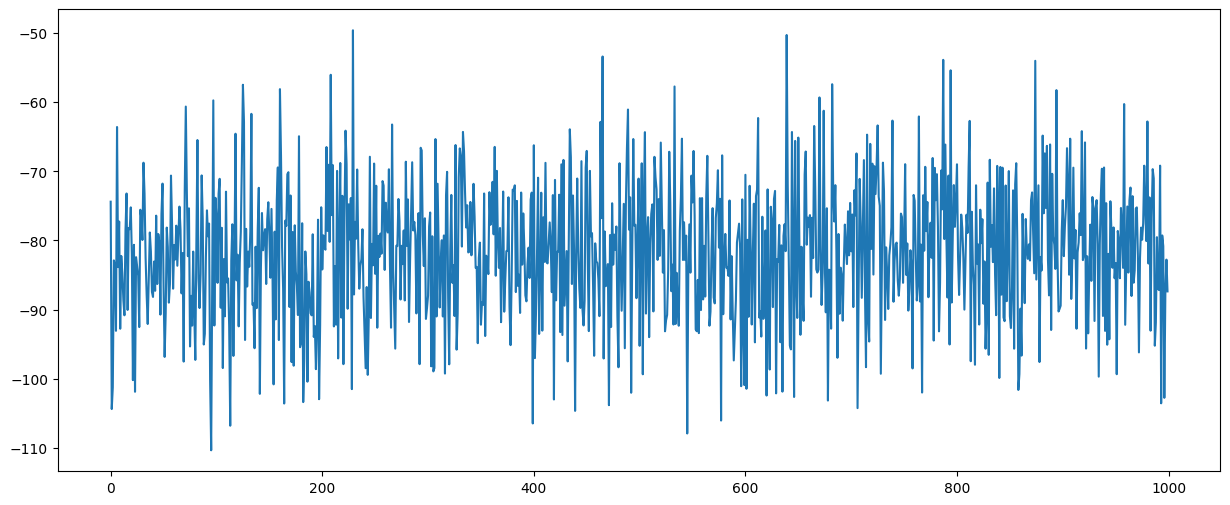

In [13]:
COGS = - (rev * np.random.normal(0.6,0.1))
 
plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.show()

In [14]:
COGS.mean()

-81.64104516667392

In [15]:
COGS.std()

9.767337941472443

### Calculate Gross Profit

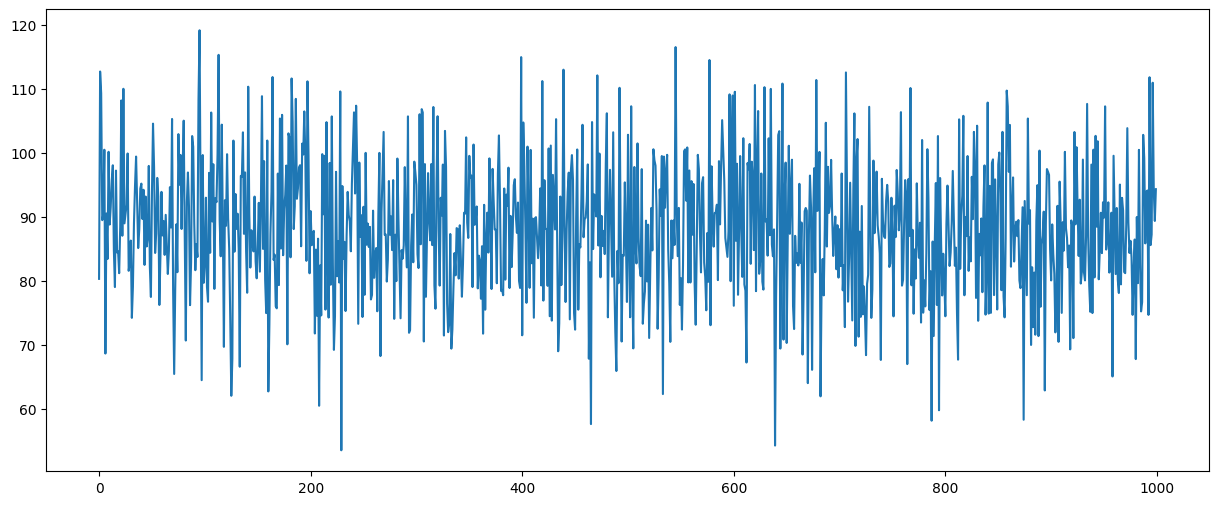

In [16]:
Gross_Profit = rev + COGS
Gross_Profit


plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [17]:
max(Gross_Profit)

119.13984695700688

In [18]:
min(Gross_Profit)

53.53434162329014

In [19]:
Gross_Profit.mean()

88.13463227595098

In [20]:
Gross_Profit.std()

10.54421505786914

Plot the Gross Profit

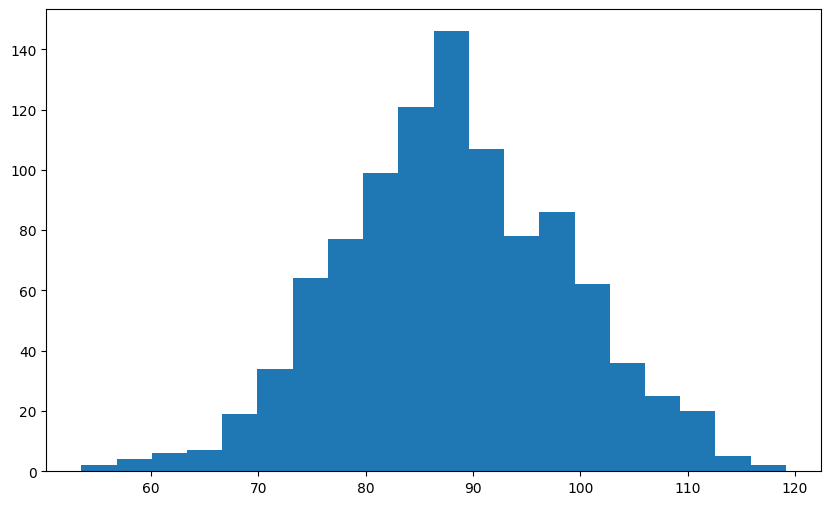

In [21]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

## Predicting Stock Price

In [14]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [15]:
data = pd.read_csv('../1-rate-of-return/PG_1995-03_23_2017.csv', index_col = 'Date')['Adj Close']
# data = wb.DataReader('PG', data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
log_returns.tail()


Date
2017-03-17   -0.004824
2017-03-20    0.002415
2017-03-21   -0.000329
2017-03-22   -0.002196
2017-03-23   -0.002421
Name: Adj Close, dtype: float64

In [16]:
u = log_returns.mean()
u

0.0003148272758777788

In [17]:
var = log_returns.var()
var

0.0002115158136830226

Calculate the drift component

$$
\text{drift} = \mu - \frac{1}{2} \cdot \sigma
$$

In [18]:
drift = u - (0.5 * var)
drift

0.0002090693690362675

In [19]:
stdev = log_returns.std()
stdev

0.014543583247708339

We won't annualizing the daily return because we'll predict daily stock price.

Calculate Z value from 10 random 2d arrays:

In [20]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.16373879,  0.36132347],
       [ 0.53473205,  0.39632585],
       [ 1.64834797,  1.85385063],
       [-0.61619646,  0.23730041],
       [ 1.34142313,  1.1561414 ],
       [-0.19331529, -0.67361861],
       [-0.13497116, -0.44263039],
       [-2.73304871, -1.29587328],
       [ 0.39473392, -1.26020571],
       [ 1.99812034, -1.19471833]])

Calculate daily returns

$$
\text{daily returns} = e^{r}
$$

$$
r = \text{drift} + \text{stdev} \times z
$$

Forcast the stock price for the upcomming 1000 days. For each day, produce 10 series of future stock price predictions:

In [22]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.96331172, 1.00356636, 0.98679617, ..., 1.00431244, 1.01416499,
        0.98393939],
       [1.0137325 , 0.98219232, 1.00451487, ..., 1.03146805, 1.00376884,
        0.99715224],
       [1.00198125, 1.01734569, 0.98833748, ..., 0.96731362, 0.99619373,
        0.99482453],
       ...,
       [1.01810485, 1.02187712, 1.00223577, ..., 0.97787106, 1.02152348,
        1.00564873],
       [0.99468977, 0.99780184, 0.99495644, ..., 0.97978451, 0.99279551,
        0.98672523],
       [0.9929165 , 0.99581392, 1.00124073, ..., 1.01609893, 0.99869912,
        1.02269477]])

In [23]:
daily_returns.shape

(1000, 10)

Predict stock price for the next 1000 days from now

$$
S_t = S_0 \times \text{daily return}_t \\

S_{t+1} = S_t \times \text{daily return}_{t+1} \\

... \\
S_{t+999} = S_{t+998} \times \text{daily return}_{t+999}
$$

The predicted price list's start value should be the last one in our data set (the current market price)

In [30]:
S0 = data.iloc[-1]
S0

90.769997

In [31]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[90.769997, 90.769997, 90.769997, ..., 90.769997, 90.769997,
        90.769997],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [27]:
price_list.shape

(1000, 10)

Calculate next day's stock price from previous price

In [32]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list

array([[ 90.769997  ,  90.769997  ,  90.769997  , ...,  90.769997  ,
         90.769997  ,  90.769997  ],
       [ 92.01649597,  89.1535939 ,  91.17981167, ...,  93.62635194,
         91.11209484,  90.51150604],
       [ 92.19880361,  90.70002494,  90.11642558, ...,  90.56604573,
         90.76529735,  90.04306627],
       ...,
       [125.95644102, 188.42754286, 207.47936638, ...,  35.42708012,
         82.23362111,  48.35527207],
       [125.28758289, 188.01334967, 206.43293255, ...,  34.7109043 ,
         81.6411697 ,  47.71336707],
       [124.40010769, 187.22630989, 206.68906038, ...,  35.26971254,
         81.53496427,  48.79621075]])

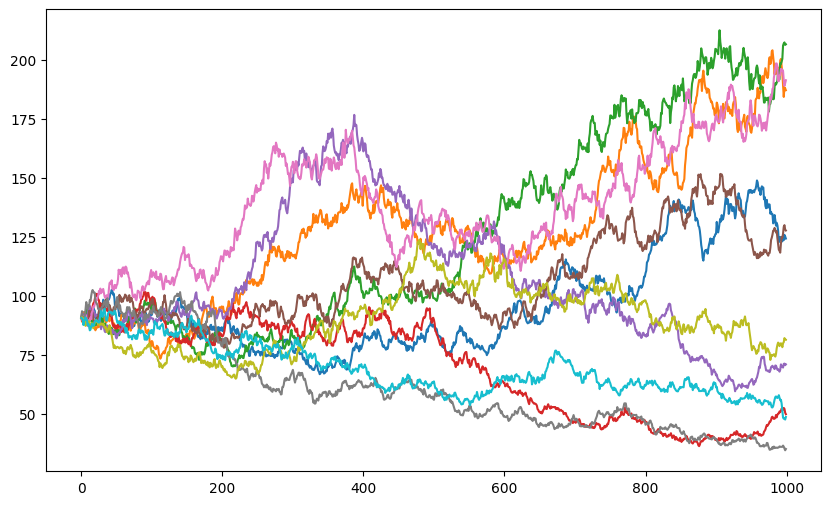

In [36]:
plt.figure(figsize=(10,6))
plt.plot(price_list);